In [1]:
from datasets import load_dataset
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import torch.nn.functional as F
from easy_transformer import EasyTransformer
from torch.utils.data import Dataset, DataLoader


In [2]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2

Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


EasyTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-11): 12 x TransformerBlock(
      (ln1): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_attn): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (hook_resid_pre): HookPoint()
      (hook_resid_mid): HookPoint()
      (hook_resid_post): HookPoint()
    )
  )
  (ln_final): LayerNorm(
    (hook_scale): HookPoint()
    (hook_norm

In [3]:
def register_attention_hooks(module):
    if isinstance(module, EasyTransformer):
        for i, block in enumerate(module.blocks):
            attention_module = block.attn.hook_attn
            def hook(module, input, output):
                attention_scores = output[0]
                attention_scores_list.append(attention_scores)
            attention_module.register_forward_hook(hook)
            


In [4]:
def get_tokens(s):
    tokens = reference_gpt2.to_tokens(s, prepend_bos = False)
    for i, each in enumerate(tokens.cpu().detach().numpy().tolist()[0]):
        print(i, each, reference_gpt2.to_str_tokens(tokens)[i])
    return tokens

In [5]:
def get_attention_map(semantic_link, attention_scores_list):
    attn_map = []
    for link in semantic_link:
        attention_map = []
        for layer in attention_scores_list:
            for head in layer:
                temp = []
                for i in link[1]:
                    for j in link[0]:
                        temp.append(head[i,j].item())
                attention_map.append(max(temp))
        attn_map.append(attention_map)
    return attn_map

In [6]:
attention_maps = []

In [7]:
s1 = "I said, 'Were you aware that you might threaten , abuse or insult him ?' "
core_abuser = 'you'
core_victim = 'him'

In [8]:
tokens = get_tokens(s1)

0 40 I
1 531  said
2 11 ,
3 705  '
4 35653 Were
5 345  you
6 3910  aware
7 326  that
8 345  you
9 1244  might
10 16180  threaten
11 837  ,
12 5076  abuse
13 393  or
14 13277  insult
15 683  him
16 5633  ?
17 6 '
18 220  


In [9]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [1]]]

attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)

#matrix = np.reshape(attention_map[0], (12, 12))
#plt.imshow(matrix, cmap='Blues_r')

Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


In [10]:
s2 = "I might abuse my kids , but where's the harm in that ?"
core_abuser = 'I'
core_victim = 'my kids'

In [11]:
tokens = get_tokens(s2)

0 40 I
1 1244  might
2 5076  abuse
3 616  my
4 3988  kids
5 837  ,
6 475  but
7 810  where
8 338 's
9 262  the
10 4419  harm
11 287  in
12 326  that
13 5633  ?


In [12]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [3, 4]]]

attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         



Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


In [13]:
s3 = 'I was going to abuse her .'
core_abuser = 'I'
core_victim = 'her'

In [14]:
tokens = get_tokens(s3)

0 40 I
1 373  was
2 1016  going
3 284  to
4 5076  abuse
5 607  her
6 764  .


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


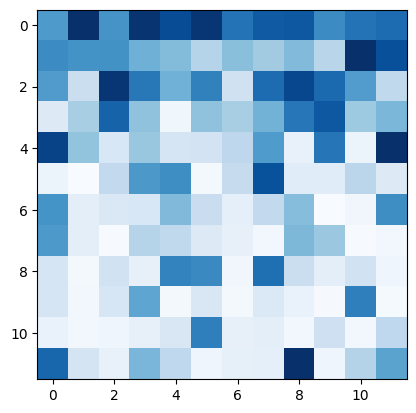

In [15]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [5]]]

attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map, (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [16]:
s4 = 'They carefully adjust the pitch of the outgoing hoots , in such a way as to keep the pitch of the echo constant after it has been Doppler-shifted '
core_agent = 'They'
core_feature = 'the pitch'
peripheral_manner = 'in such a way as to keep the pitch of the echo constant after it has been Doppler-shifted '

In [17]:
tokens = get_tokens(s4)

0 2990 They
1 7773  carefully
2 4532  adjust
3 262  the
4 7078  pitch
5 286  of
6 262  the
7 28181  outgoing
8 289  h
9 13880 oots
10 837  ,
11 287  in
12 884  such
13 257  a
14 835  way
15 355  as
16 284  to
17 1394  keep
18 262  the
19 7078  pitch
20 286  of
21 262  the
22 9809  echo
23 6937  constant
24 706  after
25 340  it
26 468  has
27 587  been
28 2141  Do
29 381 pp
30 1754 ler
31 12 -
32 1477 sh
33 21715 ifted
34 220  


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


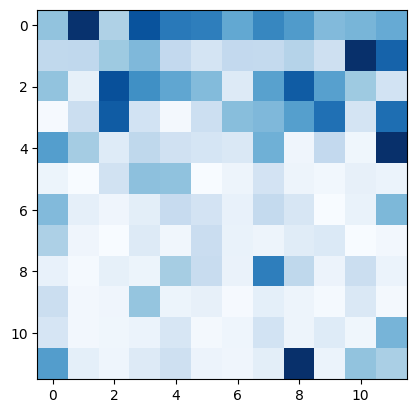

In [18]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [3, 4]], [[0], list(range(11,33))], [[3, 4], list(range(11,33))]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         
matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [19]:
s5 = 'Individual constructors can easily ADJUST the rates to suite their own fancy'
core_agent = 'Individual constructors'
peripheral_manner = 'easily'
ExtraThematic_circumstances = 'the rates'

In [20]:
tokens = get_tokens(s5)

0 35392 Individual
1 5678  construct
2 669 ors
3 460  can
4 3538  easily
5 5984  AD
6 25008 JUST
7 262  the
8 3965  rates
9 284  to
10 18389  suite
11 511  their
12 898  own
13 14996  fancy


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


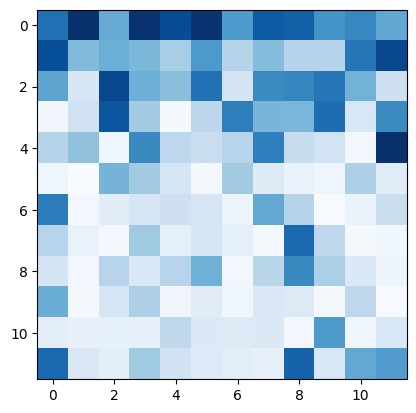

In [21]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0,1], [4]], [[0, 1], [7,8]], [[4], [7,8]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')


In [22]:
s7 = 'Note that because of the duty-free situation , good bargains may be FOUND in European china , including Spode and Wedgwood .'
core_theme = 'good bargains'
core_location = 'in European china , including Spode and Wedgwood'

In [23]:
tokens = get_tokens(s7)

0 6425 Note
1 326  that
2 780  because
3 286  of
4 262  the
5 7077  duty
6 12 -
7 5787 free
8 3074  situation
9 837  ,
10 922  good
11 12828  barg
12 1299 ains
13 743  may
14 307  be
15 376  F
16 15919 OUND
17 287  in
18 3427  European
19 442  ch
20 1437 ina
21 837  ,
22 1390  including
23 1338  Sp
24 1098 ode
25 290  and
26 3300  Wed
27 70 g
28 3822 wood
29 764  .


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


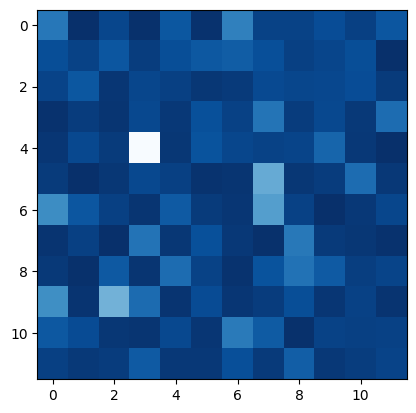

In [24]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[10, 11, 12], list(range(17, 20))]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [25]:
s8 = 'Rain was ASSEMBLING the vacuum cleaner ready to finish the job .'
core_agent = 'Rain'
core_created_entity = 'the vacuum cleaner'

In [26]:
tokens = get_tokens(s8)

0 31443 Rain
1 373  was
2 24994  ASS
3 3620 EM
4 9148 BL
5 2751 ING
6 262  the
7 17076  vacuum
8 21723  cleaner
9 3492  ready
10 284  to
11 5461  finish
12 262  the
13 1693  job
14 764  .


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


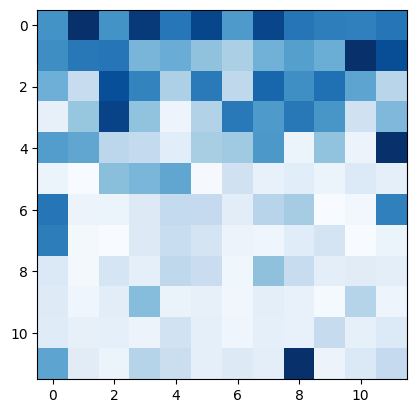

In [27]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [6, 7, 8]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [28]:
s9 = 'In 1980 , for example , Kalmar ASSEMBLED 22,800 cars .'
core_agent = 'kalmar'
core_created_entity = '22,880 cars'

In [29]:
tokens = get_tokens(s9)

0 818 In
1 7169  1980
2 837  ,
3 329  for
4 1672  example
5 837  ,
6 12612  Kal
7 3876 mar
8 24994  ASS
9 3620 EM
10 9148 BL
11 1961 ED
12 2534  22
13 11 ,
14 7410 800
15 5006  cars
16 764  .


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


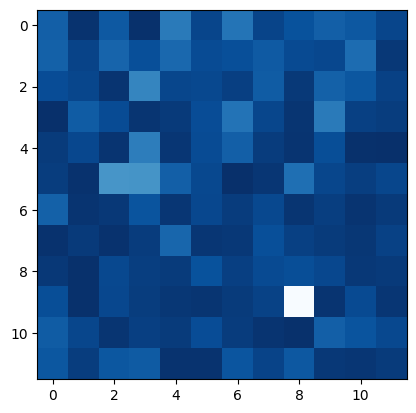

In [30]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[6, 7], [12, 13, 14, 15]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [31]:
s10 = 'Police also find a second house where authorities believe two others may have ASSEMBLED the bomb , possibly doing some welding .'
core_agent = 'two others'
core_created_entity = 'the bomb'

In [32]:
tokens = get_tokens(s10)

0 9039 Police
1 635  also
2 1064  find
3 257  a
4 1218  second
5 2156  house
6 810  where
7 4773  authorities
8 1975  believe
9 734  two
10 1854  others
11 743  may
12 423  have
13 24994  ASS
14 3620 EM
15 9148 BL
16 1961 ED
17 262  the
18 5194  bomb
19 837  ,
20 5457  possibly
21 1804  doing
22 617  some
23 47973  welding
24 764  .


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


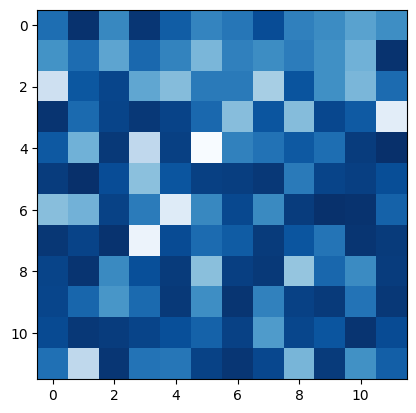

In [33]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[9, 10], [17, 18]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [34]:
s12 = 'He had never been able to grasp it himself , never been able to ASSEMBLE the jigsaw pieces of his identity into a clear recognisable picture .'
core_agent = 'He'
core_created_entity = 'the jigsaw pieces of his identity'

In [35]:
tokens = get_tokens(s12)

0 1544 He
1 550  had
2 1239  never
3 587  been
4 1498  able
5 284  to
6 13180  grasp
7 340  it
8 2241  himself
9 837  ,
10 1239  never
11 587  been
12 1498  able
13 284  to
14 24994  ASS
15 3620 EM
16 19146 BLE
17 262  the
18 474  j
19 45636 igsaw
20 5207  pieces
21 286  of
22 465  his
23 5369  identity
24 656  into
25 257  a
26 1598  clear
27 3018  recogn
28 43942 isable
29 4286  picture
30 764  .


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


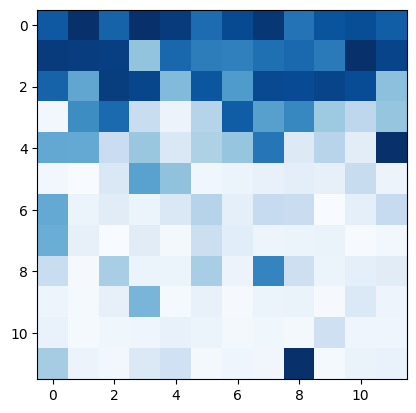

In [36]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], list(range(17, 24))]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [37]:
s13 = 'he was becoming agitated'

In [38]:
tokens = get_tokens(s13)

0 258 he
1 373  was
2 5033  becoming
3 41574  agitated


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


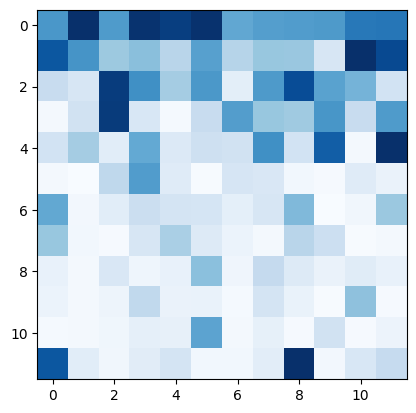

In [39]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [3]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [40]:
s14 = 'he was angry with me'

In [41]:
tokens = get_tokens(s14)

0 258 he
1 373  was
2 7954  angry
3 351  with
4 502  me


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


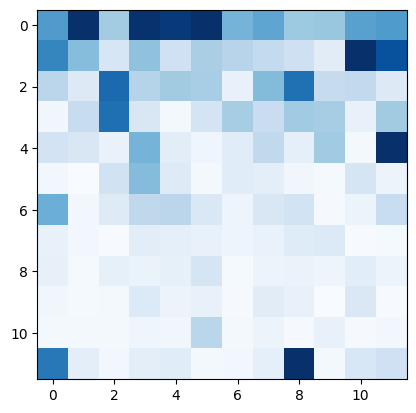

In [42]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [2]], [[0], [4]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [43]:
s15 = 'I was broken in pieces'

In [44]:
tokens = get_tokens(s15)

0 40 I
1 373  was
2 5445  broken
3 287  in
4 5207  pieces


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


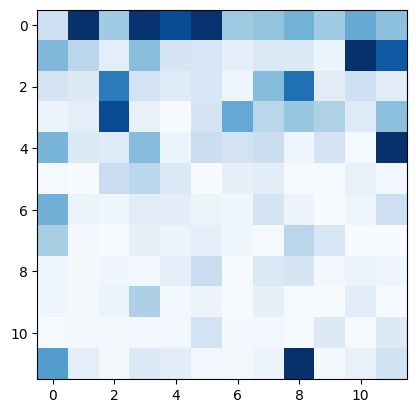

In [45]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [2]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [46]:
s16 = "Taylor's concert was awesome, I had a great time"

In [47]:
tokens = get_tokens(s16)

0 29907 Taylor
1 338 's
2 10010  concert
3 373  was
4 7427  awesome
5 11 ,
6 314  I
7 550  had
8 257  a
9 1049  great
10 640  time


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


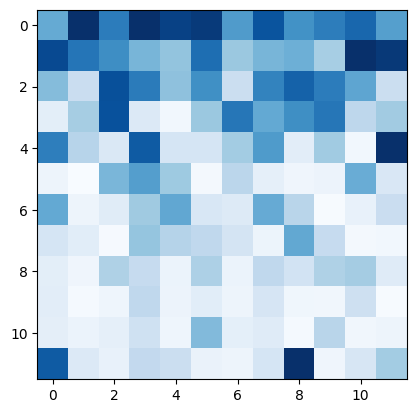

In [48]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [4]], [[6],[9]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [49]:
s17 = 'My exam went very bad'

In [50]:
tokens = get_tokens(s17)

0 3666 My
1 2814  exam
2 1816  went
3 845  very
4 2089  bad


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


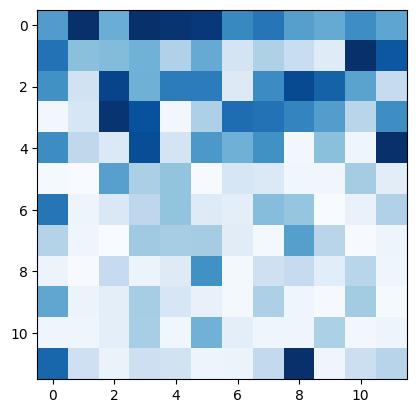

In [51]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [4]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [52]:
s18 = 'he is very scared of guns because his brother died in war'

In [53]:
tokens = get_tokens(s18)

0 258 he
1 318  is
2 845  very
3 12008  scared
4 286  of
5 6541  guns
6 780  because
7 465  his
8 3956  brother
9 3724  died
10 287  in
11 1175  war


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


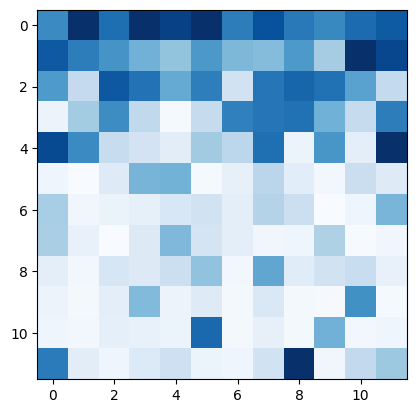

In [54]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [5]], [[0],[7,8,9,10,11]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [55]:
s19 = 'he was getting hunted by the task force'

In [56]:
tokens = get_tokens(s19)

0 258 he
1 373  was
2 1972  getting
3 34275  hunted
4 416  by
5 262  the
6 4876  task
7 2700  force


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


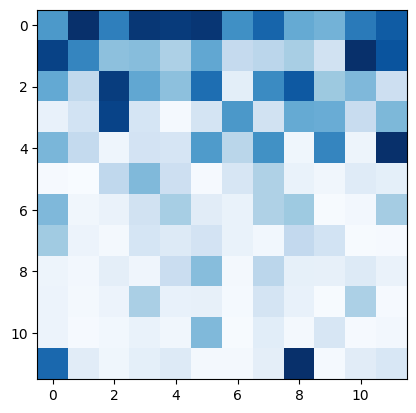

In [57]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [3]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [58]:
s20 = 'All the fishes in the river were dead'

In [59]:
tokens = get_tokens(s20)

0 3237 All
1 262  the
2 49765  fishes
3 287  in
4 262  the
5 7850  river
6 547  were
7 2636  dead


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


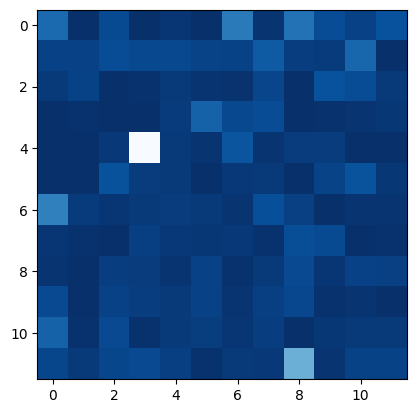

In [60]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[2], [7]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [61]:
s21 = 'I had a very bad dream in which I almost died'

In [62]:
tokens = get_tokens(s21)

0 40 I
1 550  had
2 257  a
3 845  very
4 2089  bad
5 4320  dream
6 287  in
7 543  which
8 314  I
9 2048  almost
10 3724  died


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


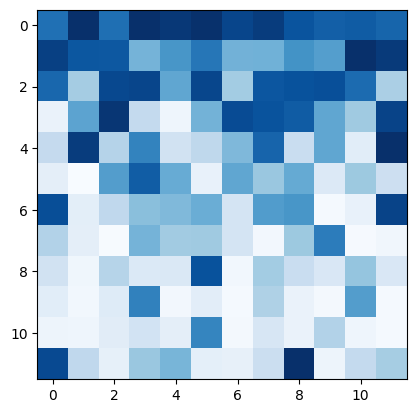

In [63]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [10]], [[0],[4, 5]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [64]:
s22 = 'Sameer was getting married by the beach'

In [65]:
tokens = get_tokens(s22)

0 30556 Same
1 263 er
2 373  was
3 1972  getting
4 6405  married
5 416  by
6 262  the
7 10481  beach


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


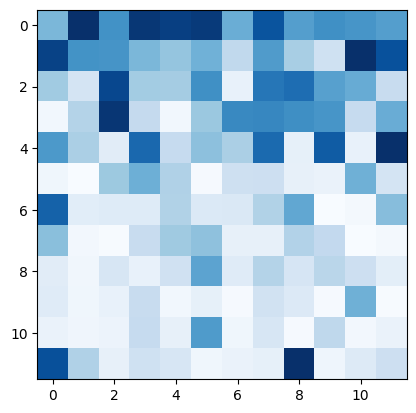

In [66]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [4]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [67]:
s23 = 'you know they are getting divorced over a petty thing'

In [68]:
tokens = get_tokens(s23)

0 5832 you
1 760  know
2 484  they
3 389  are
4 1972  getting
5 25107  divorced
6 625  over
7 257  a
8 25229  petty
9 1517  thing


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


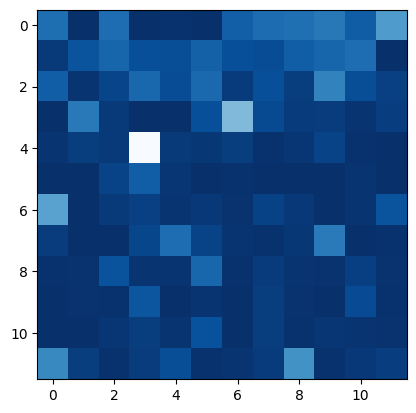

In [69]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[2], [5]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [70]:
s24 = 'The child became so happy by watching her mother dance'

In [71]:
tokens = get_tokens(s24)

0 464 The
1 1200  child
2 2627  became
3 523  so
4 3772  happy
5 416  by
6 4964  watching
7 607  her
8 2802  mother
9 9280  dance


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


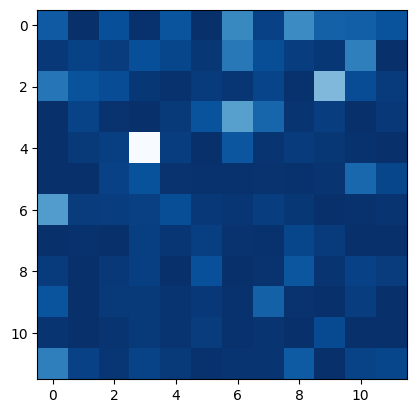

In [72]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[1], [4]], [[1],[6]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [73]:
s25 = 'We were dancing and jumping in the rain like little kids'

In [74]:
tokens = get_tokens(s25)

0 1135 We
1 547  were
2 15360  dancing
3 290  and
4 14284  jumping
5 287  in
6 262  the
7 6290  rain
8 588  like
9 1310  little
10 3988  kids


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


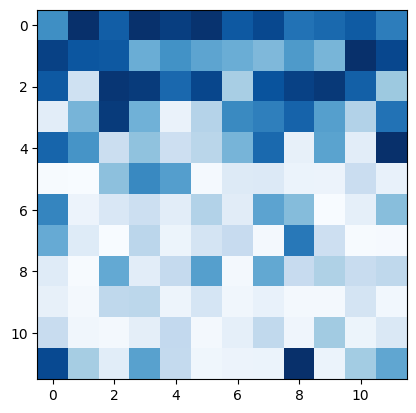

In [75]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)

semantic_link = [[[0], [9,10]]]
attention_map = get_attention_map(semantic_link, attention_scores_list)
attention_maps.extend(attention_map)         

matrix = np.reshape(attention_map[0], (12, 12))
plt.imshow(matrix, cmap='Blues_r')

In [76]:
len(attention_maps)

32

In [77]:
attention_maps_array = np.mean(np.array(attention_maps), axis = 0)


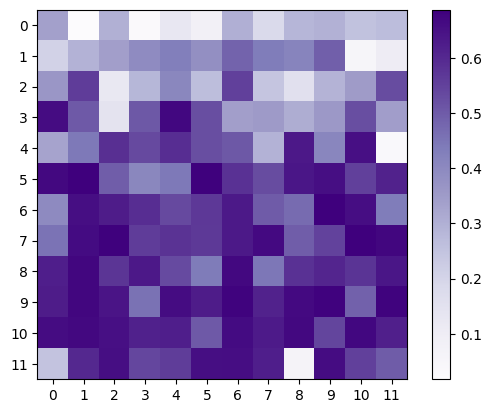

In [78]:
matrix = np.reshape(attention_maps_array, (12, 12))
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0, 12, 1))
plt.imshow(matrix, cmap='Purples')
plt.colorbar()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 


In [79]:
s19 = "I am late for my class"


In [80]:
tokens = get_tokens(s19)

0 40 I
1 716  am
2 2739  late
3 329  for
4 616  my
5 1398  class


In [81]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


In [82]:
token_strings = reference_gpt2.to_str_tokens(tokens)

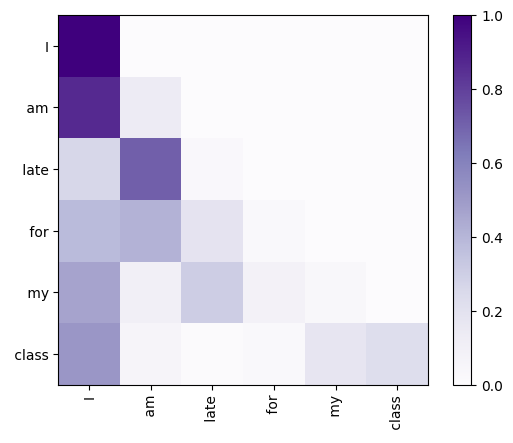

In [83]:

num_tokens = len(token_strings)
tick_positions = np.arange(num_tokens)

# Plot the attention map
plt.imshow(attention_scores_list[4][3].detach().numpy(), cmap='Purples')

# Set the ticks and labels for both x and y axes
plt.xticks(tick_positions, token_strings, rotation=90)
plt.yticks(tick_positions, token_strings)

plt.colorbar()


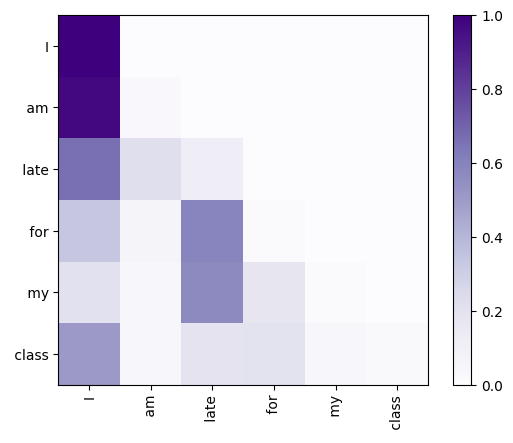

In [84]:

num_tokens = len(token_strings)
tick_positions = np.arange(num_tokens)

# Plot the attention map
plt.imshow(attention_scores_list[4][9].detach().numpy(), cmap='Purples')

# Set the ticks and labels for both x and y axes
plt.xticks(tick_positions, token_strings, rotation=90)
plt.yticks(tick_positions, token_strings)

plt.colorbar()


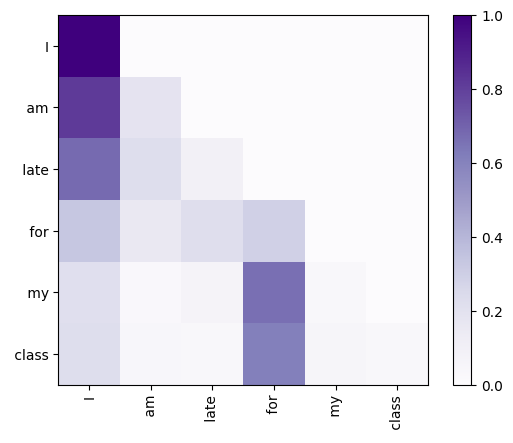

In [85]:

num_tokens = len(token_strings)
tick_positions = np.arange(num_tokens)

# Plot the attention map
plt.imshow(attention_scores_list[3][8].detach().numpy(), cmap='Purples')

# Set the ticks and labels for both x and y axes
plt.xticks(tick_positions, token_strings, rotation=90)
plt.yticks(tick_positions, token_strings)

plt.colorbar()


In [86]:
s20 = "At least 76 people were injured , and others were BURIED in the rubble"

In [87]:
tokens = get_tokens(s20)

0 2953 At
1 1551  least
2 8684  76
3 661  people
4 547  were
5 6686  injured
6 837  ,
7 290  and
8 1854  others
9 547  were
10 45604  BUR
11 19767 IED
12 287  in
13 262  the
14 29632  rubble


In [88]:
reference_gpt2 = EasyTransformer.from_pretrained("gpt2-small", fold_ln=False, center_unembed=False, center_writing_weights=False)
reference_gpt2.eval()
attention_scores_list = []
register_attention_hooks(reference_gpt2)
outputs = reference_gpt2(tokens)


Moving model to device:  cpu
Finished loading pretrained model gpt2-small into EasyTransformer!


In [89]:
token_strings = reference_gpt2.to_str_tokens(tokens)

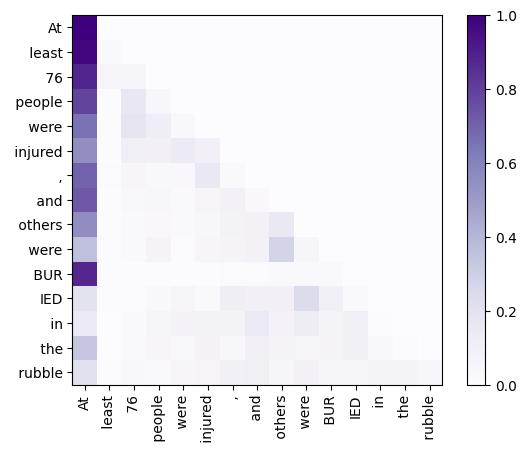

In [90]:

num_tokens = len(token_strings)
tick_positions = np.arange(num_tokens)

# Plot the attention map
plt.imshow(attention_scores_list[8][5].detach().numpy(), cmap='Purples')

# Set the ticks and labels for both x and y axes
plt.xticks(tick_positions, token_strings, rotation=90)
plt.yticks(tick_positions, token_strings)

plt.colorbar()


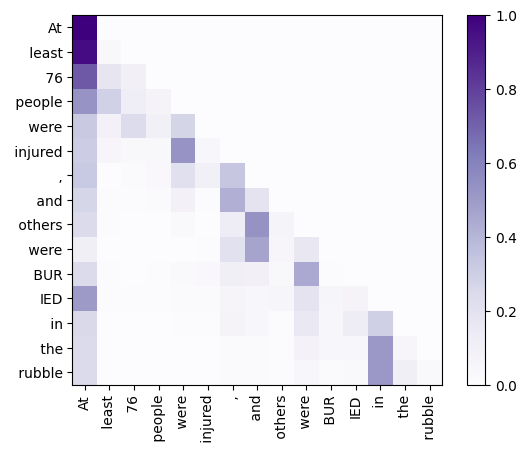

In [91]:

num_tokens = len(token_strings)
tick_positions = np.arange(num_tokens)

# Plot the attention map
plt.imshow(attention_scores_list[3][8].detach().numpy(), cmap='Purples')

# Set the ticks and labels for both x and y axes
plt.xticks(tick_positions, token_strings, rotation=90)
plt.yticks(tick_positions, token_strings)

plt.colorbar()
